In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2022-04-17 13:15:19.601428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-17 13:15:19.601467: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
generator = keras.models.load_model('datas/weights/generator.h5')
latent_dim = generator.input.shape[1]
print(f"Generator model loaded with latent dim: {latent_dim}")

2022-04-17 13:15:22.024976: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-17 13:15:22.025014: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-17 13:15:22.025043: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-04-17 13:15:22.025302: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generator model loaded with latent dim: 100


In [4]:
# Saját modell az inception v3 alapjaira (Transfer learning)
# (64, 64, 3)-as képeket vár bemenetként, majd one-hot encoding alapján adja ki a classokat (3 class)
# nem logits kimenetű
inception_model = keras.models.load_model('datas/animalFacesClassifier.h5')

In [5]:
# Gradient Descent with momentum
cross_entropy = keras.losses.CategoricalCrossentropy(from_logits=False)

def gradient_descent_momentum(goal_label, starting_noise, step_size, momentum, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    
    change = 0
    losses = []
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)[0]
            
            predictions = inception_model(generated_image)
            
            loss = cross_entropy(goal_label, predictions[0])

        gradients = g_tape.gradient(loss, noise)
        change = (step_size * gradients) + momentum * change
        noise = noise - change

        if(verbose):
            print(predictions)
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
            plt.show()

        losses.append(loss)
    return noise, losses

tf.Tensor([[0.76226103 0.0866387  0.1511003 ]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 2.4460086822509766


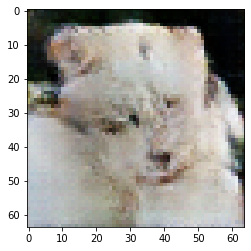

tf.Tensor([[0.7543434  0.05450512 0.19115147]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 2.9094605445861816


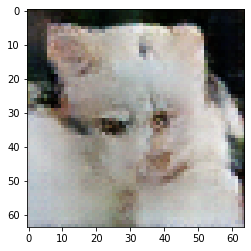

tf.Tensor([[0.29797682 0.6436978  0.05832529]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 0.4405258297920227


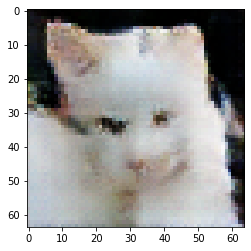

tf.Tensor([[0.7713927  0.217709   0.01089832]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 1.5245959758758545


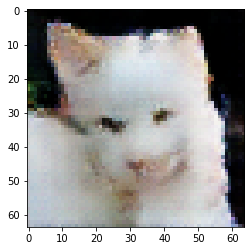

tf.Tensor([[0.95911515 0.034892   0.00599285]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 3.3554975986480713


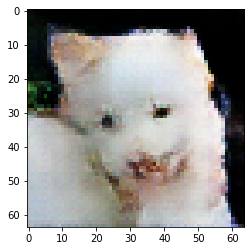

tf.Tensor([[0.22600478 0.771798   0.00219716]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.25903233885765076


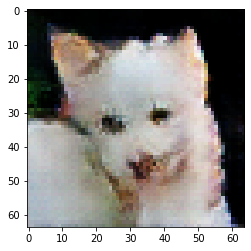

tf.Tensor([[0.5303471  0.43712536 0.03252763]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.8275353908538818


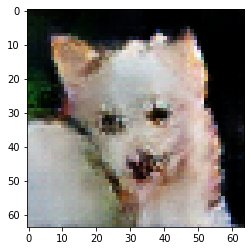

tf.Tensor([[0.1866479  0.7600629  0.05328922]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.27435413002967834


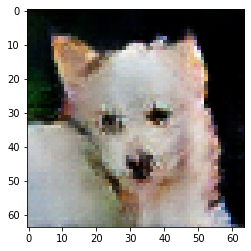

tf.Tensor([[0.13584678 0.8583866  0.00576655]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.15270066261291504


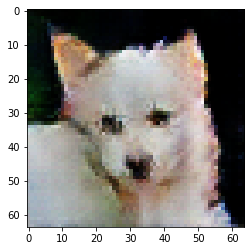

tf.Tensor([[0.11494226 0.820656   0.06440178]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.19765125215053558


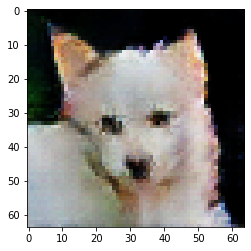

tf.Tensor([[0.03477407 0.89345694 0.07176905]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.11265714466571808


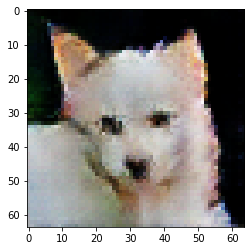

tf.Tensor([[0.0569527  0.9289319  0.01411535]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.07371979206800461


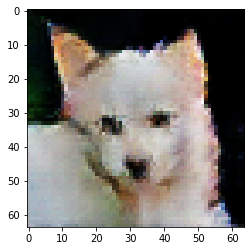

tf.Tensor([[0.03263075 0.9385913  0.02877788]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.0633750781416893


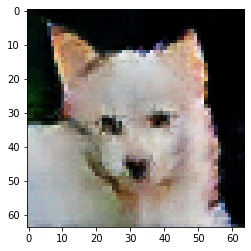

tf.Tensor([[0.10705536 0.8786722  0.01427246]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.12934339046478271


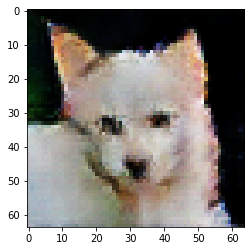

tf.Tensor([[0.30664498 0.6428857  0.05046931]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.44178834557533264


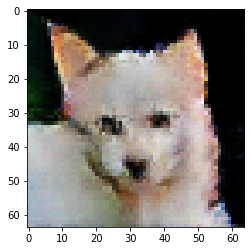

tf.Tensor([[0.24099645 0.5390837  0.21991982]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.6178843975067139


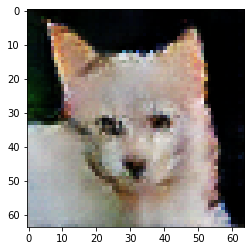

tf.Tensor([[0.00825937 0.90908116 0.08265954]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.09532090276479721


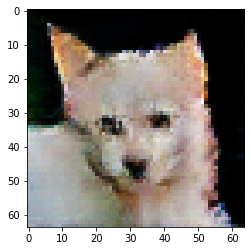

tf.Tensor([[0.07269169 0.85233164 0.07497665]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.15977950394153595


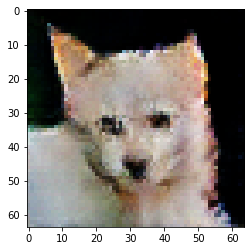

tf.Tensor([[0.01650894 0.9523477  0.03114341]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.048825085163116455


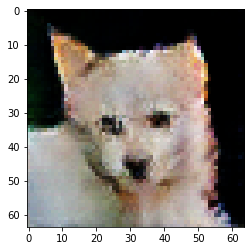

tf.Tensor([[0.01476694 0.8280803  0.15715274]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.1886451542377472


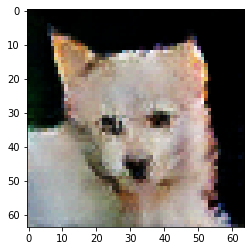

tf.Tensor(0.18864515, shape=(), dtype=float32)


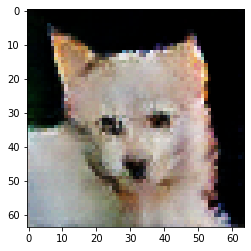

tf.Tensor([[0.0286892  0.03666736 0.93464345]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 3.30586838722229


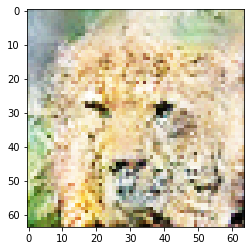

tf.Tensor([[1.0344515e-04 2.1042782e-04 9.9968612e-01]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 8.466367721557617


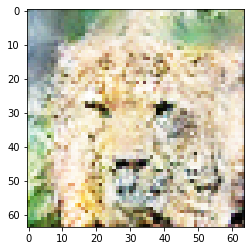

tf.Tensor([[0.6097775  0.19883917 0.19138332]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 1.6152589321136475


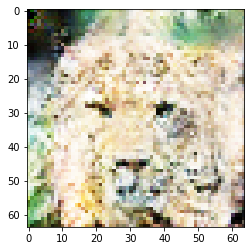

tf.Tensor([[0.30036318 0.31491187 0.38472494]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 1.1554625034332275


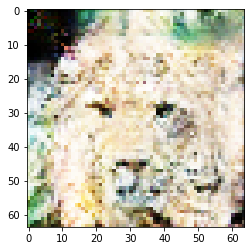

tf.Tensor([[0.22413279 0.29128557 0.48458162]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 1.2334511280059814


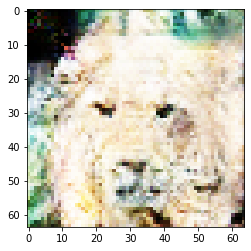

tf.Tensor([[0.06387787 0.59607965 0.34004247]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.5173810124397278


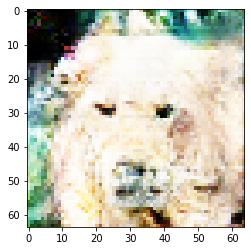

tf.Tensor([[0.10039598 0.70131344 0.19829051]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.354800283908844


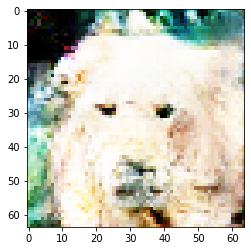

tf.Tensor([[0.00995061 0.7617828  0.22826655]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.2720937728881836


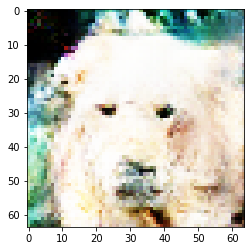

tf.Tensor([[0.00342829 0.96543926 0.03113248]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.03517208993434906


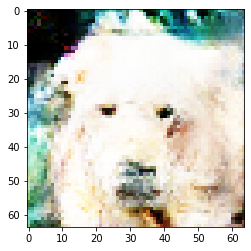

tf.Tensor([[0.00250442 0.90034133 0.0971543 ]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.10498133301734924


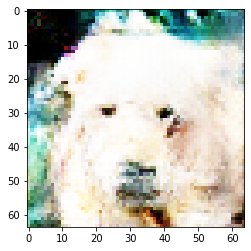

tf.Tensor([[0.03369845 0.821644   0.14465757]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.19644805788993835


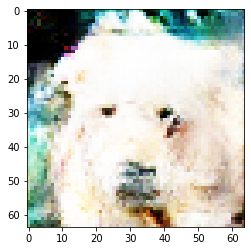

tf.Tensor([[0.01210806 0.9808702  0.00702175]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.01931515522301197


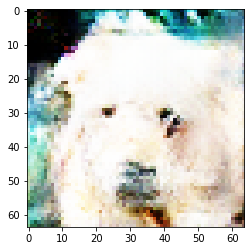

tf.Tensor([[5.3212297e-04 9.8413301e-01 1.5334835e-02]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.015994222834706306


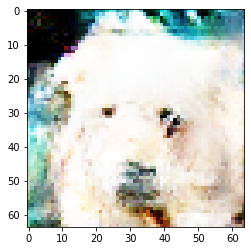

tf.Tensor([[0.16538215 0.8209462  0.01367168]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.19729767739772797


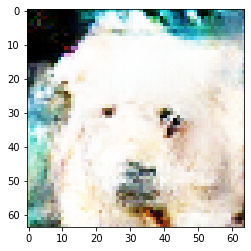

tf.Tensor([[5.2086561e-04 9.7234029e-01 2.7138801e-02]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.028049446642398834


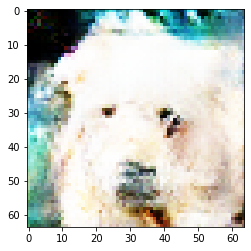

tf.Tensor([[0.01423367 0.9653921  0.0203742 ]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.03522086516022682


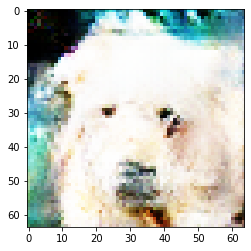

tf.Tensor([[0.03576648 0.91193837 0.05229515]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.09218286722898483


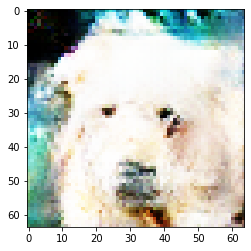

tf.Tensor([[5.4024165e-03 9.9373090e-01 8.6671143e-04]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.006288950797170401


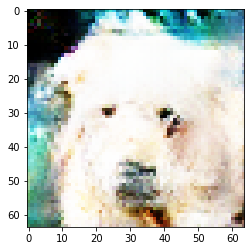

tf.Tensor([[0.36378476 0.5854587  0.05075654]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.5353595614433289


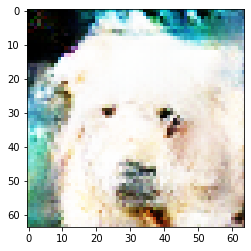

tf.Tensor([[0.0032489  0.96133906 0.03541204]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.03942805528640747


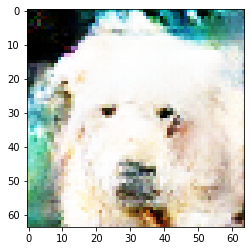

tf.Tensor(0.039428055, shape=(), dtype=float32)


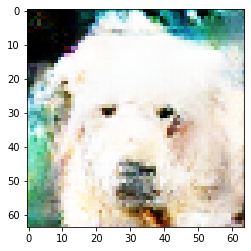

tf.Tensor([[0.7194475  0.1113361  0.16921641]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 2.1952016353607178


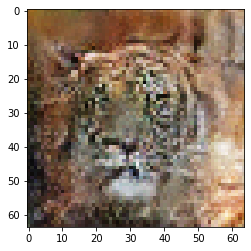

tf.Tensor([[9.7359362e-04 6.7748857e-04 9.9834895e-01]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 7.297117710113525


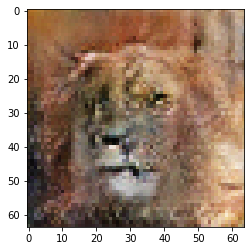

tf.Tensor([[0.08978434 0.01743203 0.8927836 ]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 4.049446105957031


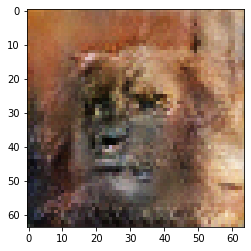

tf.Tensor([[0.44623303 0.54214424 0.01162271]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 0.612223207950592


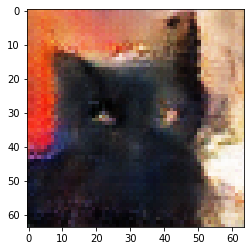

tf.Tensor([[0.3536157  0.6452257  0.00115856]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 0.43815499544143677


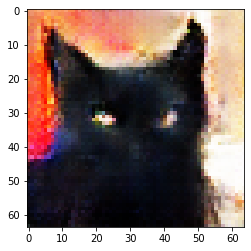

tf.Tensor([[0.7423276  0.25572315 0.0019493 ]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 1.3636598587036133


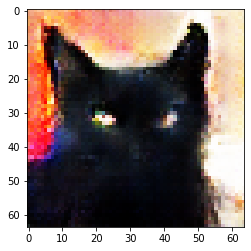

tf.Tensor([[8.9466059e-01 1.0461001e-01 7.2934420e-04]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 2.2575159072875977


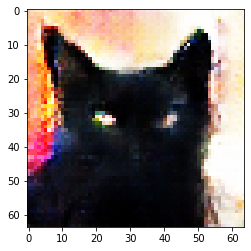

tf.Tensor([[0.17227973 0.8262839  0.00143643]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.19081689417362213


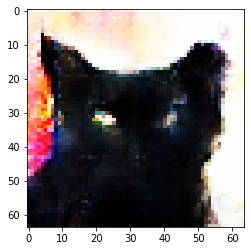

tf.Tensor([[0.13056543 0.8684197  0.00101489]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.14108029007911682


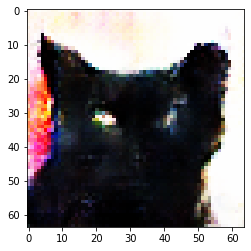

tf.Tensor([[9.4091874e-03 9.9031675e-01 2.7395147e-04]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.009730318561196327


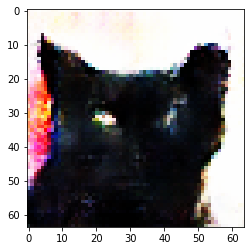

tf.Tensor([[1.9663344e-01 8.0271643e-01 6.5008522e-04]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.21975375711917877


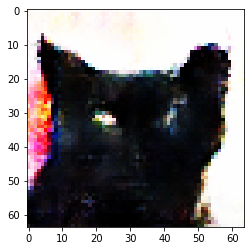

tf.Tensor([[3.5606292e-01 6.4342690e-01 5.1014399e-04]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.4409467577934265


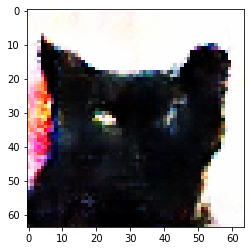

tf.Tensor([[8.3180577e-02 9.1639417e-01 4.2527897e-04]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.08730868250131607


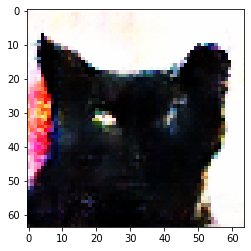

tf.Tensor([[4.8047308e-02 9.5133245e-01 6.2023185e-04]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.049891699105501175


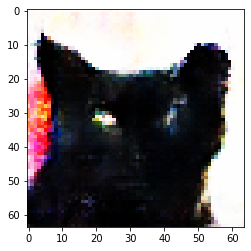

tf.Tensor([[6.6583559e-02 9.3249309e-01 9.2330197e-04]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.06989347189664841


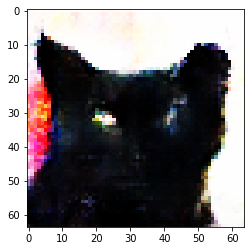

tf.Tensor([[4.5820701e-01 5.4162651e-01 1.6651225e-04]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.6131786108016968


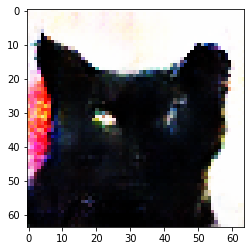

tf.Tensor([[1.2111914e-02 9.8780638e-01 8.1728642e-05]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.012268572114408016


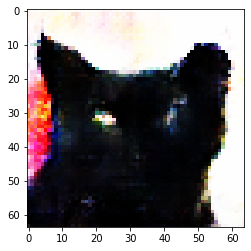

tf.Tensor([[0.47962373 0.51603657 0.00433964]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.6615775227546692


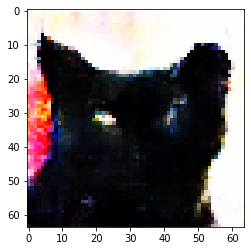

tf.Tensor([[5.7579532e-02 9.4232464e-01 9.5845375e-05]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.05940543860197067


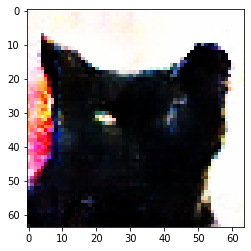

tf.Tensor([[2.8302124e-02 9.7075719e-01 9.4075047e-04]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.029679030179977417


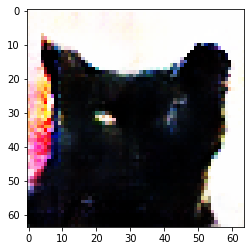

tf.Tensor(0.02967903, shape=(), dtype=float32)


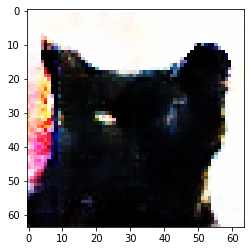

In [6]:
# TODO: a keresést egyszerre több elemre végezni, hogy ne egymás után kelljen

# cat = [1, 0, 0]
# dog = [0, 1, 0]
# wild = [0, 0, 1]

# Kutya visszakeresése
goal_prediction = [0, 1, 0]

all_losses = []
for i in range(3):
    starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
    
    gradient_momentum_noise, gdm_losses =\
        gradient_descent_momentum(goal_prediction, starting_noise, 0.1, 0.5, 20, verbose=True)
    
    all_losses.append(gdm_losses)
    print(gdm_losses[-1])
    generated_image = generator(gradient_momentum_noise, training=False)[0]
    plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
    plt.show()

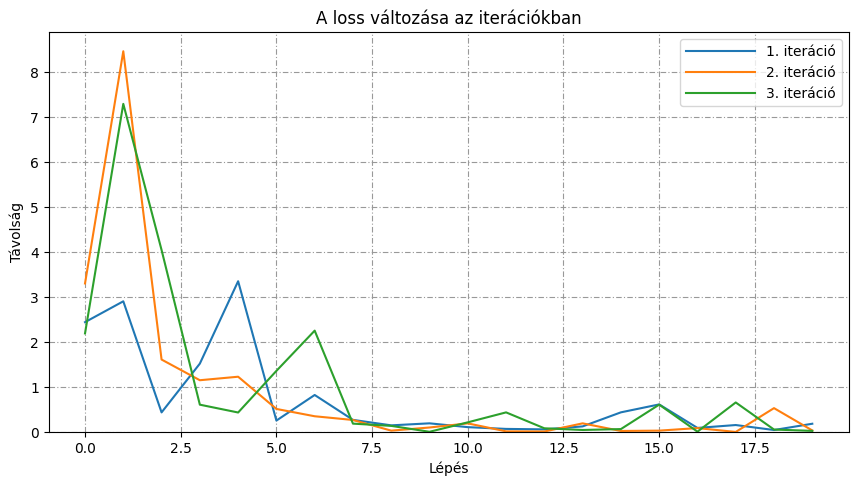

In [8]:
fig_1 = plt.figure(figsize=(8, 4), dpi=100)
ax = fig_1.add_axes([0, 0, 1, 1])
ax.set_xlabel('Lépés')
ax.set_ylabel('Távolság')
ax.set_title('A loss változása az iterációkban')

ax.grid(True, color='0.6', dashes=(5, 2, 1, 2))

for i in range(len(all_losses)):
    ax.plot(all_losses[i], label=str(i+1)+". iteráció")

ax.set_ylim(bottom=0)
ax.legend(loc=0, handlelength=5)

plt.show()